# Zadanie 2.1

In [22]:
import numpy as np

def czyNiePierwsza(x):
    if x > 7:
        return tuple([(x%i)==0 for i in range(2,x//2)])
    elif x<=7 and x!=1:
        return tuple([(x%i)==0 for i in range(2,x)])
    else:
        return True


def czyPierwsze(v1):
    v2 = [not(np.asarray(czyNiePierwsza(a)).any()) for a in v1]
    return v2

czyPierwsze(np.array([1,1,2,3,4,5,6,7,8,9,10,11,22,19, 126443,11]))

[False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True]

# Zadanie 2.2

In [23]:
import numpy as np

def sredniaRuchoma(x, k):
    xlen=len(x)
    y = np.zeros((xlen-k+1,))
    for j in range(xlen-k+1):
         y[j] = np.sum(x[j:(j+k)])
    return y/k    

x1=np.array([1,2,3,4,5,6,7,8,9,10])
x2=np.array([1,3,5,6,4,5,6])
print(sredniaRuchoma(x1,1))
print(sredniaRuchoma(x1,2))
print(sredniaRuchoma(x1,3))
print(sredniaRuchoma(x2,3))

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]
[ 2.  3.  4.  5.  6.  7.  8.  9.]
[ 3.          4.66666667  5.          5.          5.        ]


# Zadanie 2.3

In [24]:
def dwumian(N,k):
    if k<N-k:
        a=k
    else:
        a=N-k
    r=1
    for i in range(a):
        r=r*(N-a+1+i)/(i+1)
    return r
        
print(dwumian(8,3))

56.0


# Zadanie 2.4

In [25]:
import numpy as np

def wartoscWielomianu(v,x):
    w=0
    for i, e in enumerate(v):
        w=w+e*np.power(x,i)
    return w

print(wartoscWielomianu(np.array([1,1,1]),0))
print(wartoscWielomianu(np.array([1,2,3]),1))
print(wartoscWielomianu(np.array([1,2,3]),2))

1
6
17


# Zadanie 2.5

In [26]:
import pandas as pd
import sqlite3
import os

filenames = ('flights','airports', 'planes', 'airlines')
pd_base = dict()

for fname in filenames:
    pd_base[fname] = pd.read_csv('http://www.gagolewski.com/resources/data/nycflights13_{}.csv.gz'.format(fname),
        comment = '#', 
        compression = 'gzip'
    )

db_name = 'nycflights13.db'
con = sqlite3.connect(os.path.join(os.getcwd(), db_name))

for fname in filenames:
    #pd_base[fname].to_sql(fname, con)
    locals()['pd_{}'.format(fname)] = pd_base[fname]
    
cartail=pd_flights[["carrier", "tailnum"]].drop_duplicates(["carrier", "tailnum"])
m1 = pd.merge(cartail,pd_planes.reset_index(), on="tailnum").drop_duplicates()
m2=  pd.merge(m1,pd_airlines.reset_index(), on="carrier").drop_duplicates()
m2[["index_x","tailnum","year","type","manufacturer","model","engines","seats","speed","engine","index_y","carrier","name"]].sort_values(by="index_x", ascending=True).reset_index(drop=True)

,index_x,tailnum,year,type,manufacturer,model,engines,seats,speed,engine,index_y,carrier,name
0,0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,5,EV,ExpressJet Airlines Inc.
1,1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,12,US,US Airways Inc.
2,2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,12,US,US Airways Inc.
3,3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,12,US,US Airways Inc.
4,4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan,5,EV,ExpressJet Airlines Inc.
5,5,N105UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,12,US,US Airways Inc.
6,6,N107US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,12,US,US Airways Inc.
7,7,N108UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,12,US,US Airways Inc.
8,8,N109UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,12,US,US Airways Inc.
9,9,N110UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan,12,US,US Airways Inc.


# Zadanie 2.6

In [27]:
import pandas as pd
import numpy as np
import sqlite3
import os

filenames = ('flights','airports', 'planes', 'airlines', 'weather')
pd_base = dict()

for fname in filenames:
    pd_base[fname] = pd.read_csv('http://www.gagolewski.com/resources/data/nycflights13_{}.csv.gz'.format(fname),
        comment = '#', 
        compression = 'gzip'
    )

db_name = 'nycflights13.db'
con = sqlite3.connect(os.path.join(os.getcwd(), db_name))

for fname in filenames:
    #pd_base[fname].to_sql(fname, con)
    locals()['pd_{}'.format(fname)] = pd_base[fname]
    
flights2 = pd_flights[(pd_flights["origin"] == "EWR")]
weather2 = pd_weather[(pd_weather["origin"] == "EWR")][["year", "month", "day", "temp", "humid", "pressure"]].groupby(["year", "month", "day"]).agg(["mean"])
weather2.columns = ["weather2.atemp","weather2.ahumid", "weather2.apressure"]
m1 = flights2.join(weather2, on=["year","month","day"])
m1.reset_index()

,index,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,origin,dest,air_time,distance,hour,minute,time_hour,weather2.atemp,weather2.ahumid,weather2.apressure
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,38.4800,58.386087,1012.442857
1,5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,...,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00,38.4800,58.386087,1012.442857
2,6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,...,EWR,FLL,158.0,1065,6,0,2013-01-01 06:00:00,38.4800,58.386087,1012.442857
3,13,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,...,EWR,SFO,361.0,2565,6,0,2013-01-01 06:00:00,38.4800,58.386087,1012.442857
4,16,2013,1,1,559.0,600,-1.0,854.0,902,-8.0,...,EWR,LAS,337.0,2227,6,0,2013-01-01 06:00:00,38.4800,58.386087,1012.442857
5,19,2013,1,1,601.0,600,1.0,844.0,850,-6.0,...,EWR,PBI,147.0,1023,6,0,2013-01-01 06:00:00,38.4800,58.386087,1012.442857
6,22,2013,1,1,606.0,610,-4.0,858.0,910,-12.0,...,EWR,MIA,152.0,1085,6,10,2013-01-01 06:00:00,38.4800,58.386087,1012.442857
7,24,2013,1,1,607.0,607,0.0,858.0,915,-17.0,...,EWR,MIA,157.0,1085,6,7,2013-01-01 06:00:00,38.4800,58.386087,1012.442857
8,25,2013,1,1,608.0,600,8.0,807.0,735,32.0,...,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00,38.4800,58.386087,1012.442857
9,29,2013,1,1,615.0,615,0.0,833.0,842,-9.0,...,EWR,ATL,120.0,746,6,15,2013-01-01 06:00:00,38.4800,58.386087,1012.442857


# Zadanie 2.7

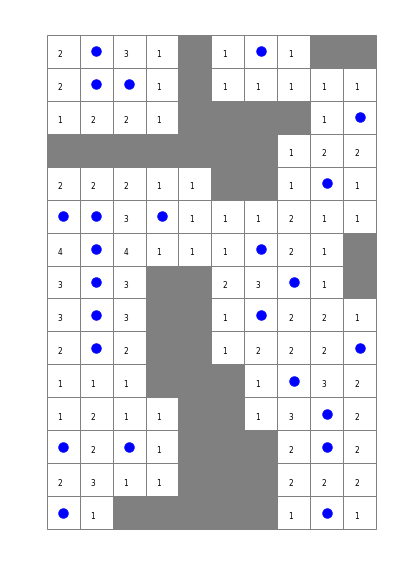

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def wygenerujPlansze(liczbaWierszy, liczbaKolumn, liczbaMin):
    npPlansza=np.zeros((liczbaWierszy*liczbaKolumn))
    
    for i in range(liczbaMin):
        npPlansza[i]=-1

    np.random.shuffle(npPlansza)

    npPlansza2 = npPlansza.reshape((liczbaWierszy, liczbaKolumn))

    npPlanszaDuza=np.zeros((liczbaWierszy+2, liczbaKolumn+2))

    for index,x in np.ndenumerate(npPlansza2):
        npPlanszaDuza[index[0]+1][index[1]+1] = x

    for index,x in np.ndenumerate(npPlanszaDuza):
        if x == -1:
        
            a = npPlanszaDuza[index[0]-1][index[1]-1]
            if a != -1:
                npPlanszaDuza[index[0]-1][index[1]-1] +=1
        
            a = npPlanszaDuza[index[0]-1][index[1]]
            if a != -1:
                npPlanszaDuza[index[0]-1][index[1]] +=1
            
            a = npPlanszaDuza[index[0]-1][index[1]+1]
            if a != -1:
                npPlanszaDuza[index[0]-1][index[1]+1] +=1
            
            a = npPlanszaDuza[index[0]][index[1]-1]
            if a != -1:
                npPlanszaDuza[index[0]][index[1]-1] +=1
            
            a = npPlanszaDuza[index[0]][index[1]+1]
            if a != -1:
                npPlanszaDuza[index[0]][index[1]+1] +=1
            
            a = npPlanszaDuza[index[0]+1][index[1]-1]
            if a != -1:
                npPlanszaDuza[index[0]+1][index[1]-1] +=1
            
            a = npPlanszaDuza[index[0]+1][index[1]]
            if a != -1:
                npPlanszaDuza[index[0]+1][index[1]] +=1
            
            a = npPlanszaDuza[index[0]+1][index[1]+1]
            if a != -1:
                npPlanszaDuza[index[0]+1][index[1]+1] +=1
        

    for index,x in np.ndenumerate(npPlanszaDuza):
        if index[0]>0 and index[0]<liczbaWierszy+1 and index[1]>0 and index[1]<liczbaKolumn+1:
            npPlansza2[index[0]-1][index[1]-1] = x
        
    return npPlansza2

def narysujSapera(plansza):


    fig1 = plt.figure()

    ax1 = fig1.add_subplot(111, aspect='equal')
    ax1.axis('off') 

    if plansza.shape[0] >=plansza.shape[1]:
        a = 1 / (plansza.shape[0]+1)
    else:
        a = 1 / (plansza.shape[1]+1)

    for index, p in np.ndenumerate(plansza):
        if p==0:
            bFill=True
        else:
            bFill=False
        ax1.add_patch(
            patches.Rectangle(
                (0.01+index[1]*a, 0.01+index[0]*a),   # (x,y)
                a,          # width
                a,          # height
                fill=bFill, color = "grey"))

    for index, p in np.ndenumerate(plansza):
        if p>0:
            ax1.text(0.01+index[1]*a+a/3, 0.01+index[0]*a+a/3, int(p), fontsize = a*120)
        elif p==-1:
            plt.plot(0.01+index[1]*a+a/2, 0.01+index[0]*a+a/2,'o', color='blue',markerfacecolor='blue', markersize=a*150) 

    plt.show()

liczbaWierszy=15
liczbaKolumn=10
liczbaMin=24
plt.rcParams["figure.figsize"] = (10,10)
narysujSapera(wygenerujPlansze(liczbaWierszy,liczbaKolumn,liczbaMin))

# Zadanie 2.8

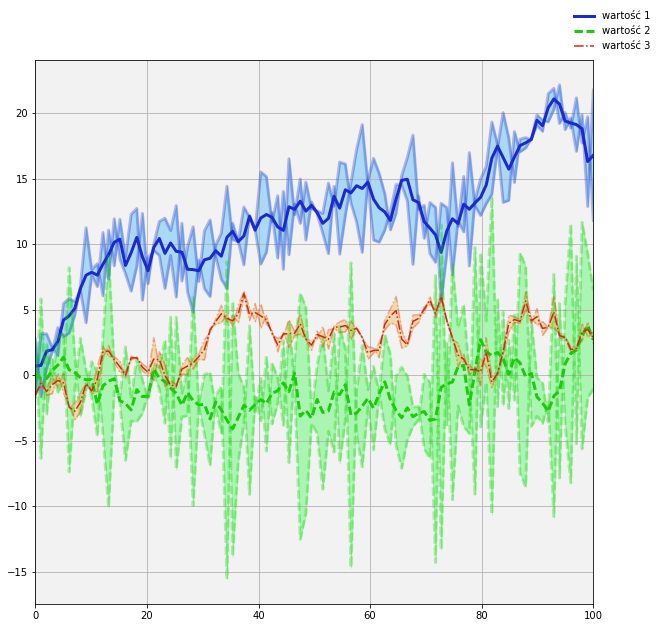

In [29]:
from matplotlib import pyplot as plt
import numpy as np

n = 100
wartosci1 = np.random.normal(0, 1, n).cumsum()
bledy1 = np.random.normal(0, 2, n)
a1=wartosci1-bledy1
a2=wartosci1+bledy1

wartosci2 = np.random.normal(0, 1, n).cumsum()
bledy2 = np.random.normal(0, 5, n)
b1=wartosci2-bledy2
b2=wartosci2+bledy2

wartosci3 = np.random.normal(0, 1, n).cumsum()
bledy3 = np.random.normal(0, 0.5, n)
c1=wartosci3-bledy3
c2=wartosci3+bledy3

k1, = plt.plot(np.linspace(0, 100, 100), wartosci1, color="#1B2ACC", linewidth=3)
plt.fill_between(np.linspace(0, 100, 100),a1, a2, color="#089FFF", alpha=0.3)
plt.plot(np.linspace(0, 100, 100), a1, color="#1B2ACC", alpha=0.3, linewidth=3)
plt.plot(np.linspace(0, 100, 100), a2, color="#1B2ACC", alpha=0.3, linewidth=3)

k2, = plt.plot(np.linspace(0, 100, 100), wartosci2, color="#1BCC0A", linestyle="--", linewidth=3)
plt.fill_between(np.linspace(0, 100, 100),b1, b2, color="#08FF1F", alpha=0.3)
plt.plot(np.linspace(0, 100, 100), b1, color="#1BCC0A", alpha=0.3, linestyle="--", linewidth=3)
plt.plot(np.linspace(0, 100, 100), b2, color="#1BCC0A", alpha=0.3, linestyle="--", linewidth=3)

k3, = plt.plot(np.linspace(0, 100, 100), wartosci3, color="#CC2A1B", linestyle="-.")
plt.fill_between(np.linspace(0, 100, 100),c1, c2, color="#FF9F08", alpha=0.3)
plt.plot(np.linspace(0, 100, 100), c1, color="#CC2A1B", alpha=0.3, linestyle="-.")
plt.plot(np.linspace(0, 100, 100), c2, color="#CC2A1B", alpha=0.3, linestyle="-.")

plt.legend([k1, k2, k3], ["wartość 1", "wartość 2", "wartość 3"], frameon=False, bbox_to_anchor=(0.95, 1))

plt.rcParams["figure.figsize"] = (10,10)
plt.grid(True)
plt.gca().patch.set_facecolor('0.95')
plt.xlim((0,100))
plt.show()